In [ ]:
from defisheye import Defisheye



In [ ]:

dtype = 'linear'
format = 'fullframe'
fov = 180
pfov = 120

In [ ]:


img = "camera.png"
img_out = f"normal.png"

In [ ]:
obj = Defisheye(img, dtype=dtype, format=format, fov=fov, pfov=pfov)

# To save image locally 
obj.convert(outfile=img_out)

# To use the converted image in memory

new_image = obj.convert()

[ WARN:0@2.556] global loadsave.cpp:268 findDecoder imread_('image.png'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

In [1]:
from torchvision.datasets import coco
from pathlib import Path
import torch, torchvision
import numpy as np
import torchvision.datasets as dset
import torchvision.transforms as transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [2]:
dataset_path = Path('data')
train_images, train_ann = f"{dataset_path}/train/images", f"{dataset_path}/train/train.json"
test_images, test_ann = f"{dataset_path}/test/images", f"{dataset_path}/test/test.json"

In [3]:
train_dataset = coco.CocoDetection(train_images, annFile=train_ann)
test_dataset = coco.CocoDetection(test_images, annFile=test_ann)
# cap = dset.CocoCaptions(root = train_images, annFile = train_ann, transform=transforms.PILToTensor())


loading annotations into memory...
Done (t=0.42s)
creating index...
index created!
loading annotations into memory...
Done (t=0.18s)
creating index...
index created!


In [4]:
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
# model = torch.load("yolo11m.pt")


Using cache found in /home/torab/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-6-22 Python-3.13.4 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5815MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [5]:

img, target = train_dataset[0]

print("Image Size: ", img)
print(target)


Image Size:  <PIL.Image.Image image mode=RGB size=1225x1088 at 0x7B7F364970E0>
[{'id': 27700, 'image_id': 310, 'category_id': 1, 'bbox': [145, 343, 74, 108], 'area': 7992, 'iscrowd': 0}, {'id': 27701, 'image_id': 310, 'category_id': 1, 'bbox': [684, 295, 55, 51], 'area': 2805, 'iscrowd': 0}, {'id': 27702, 'image_id': 310, 'category_id': 1, 'bbox': [561, 676, 128, 150], 'area': 19200, 'iscrowd': 0}, {'id': 27703, 'image_id': 310, 'category_id': 1, 'bbox': [803, 416, 66, 64], 'area': 4224, 'iscrowd': 0}, {'id': 27704, 'image_id': 310, 'category_id': 1, 'bbox': [996, 682, 61, 56], 'area': 3416, 'iscrowd': 0}, {'id': 27705, 'image_id': 310, 'category_id': 1, 'bbox': [1057, 743, 43, 39], 'area': 1677, 'iscrowd': 0}, {'id': 27706, 'image_id': 310, 'category_id': 2, 'bbox': [380, 173, 62, 37], 'area': 2294, 'iscrowd': 0}, {'id': 27707, 'image_id': 310, 'category_id': 2, 'bbox': [410, 139, 56, 30], 'area': 1680, 'iscrowd': 0}, {'id': 27708, 'image_id': 310, 'category_id': 2, 'bbox': [934, 450,

In [6]:
# coco_detection = coco.CocoDetection()
# train_dataset.coco.annToMask()?

/home/torab/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1088x1225 5 cars, 1 traffic light
Speed: 14.4ms pre-process, 163.0ms inference, 281.0ms NMS per image at shape (1, 3, 576, 640)


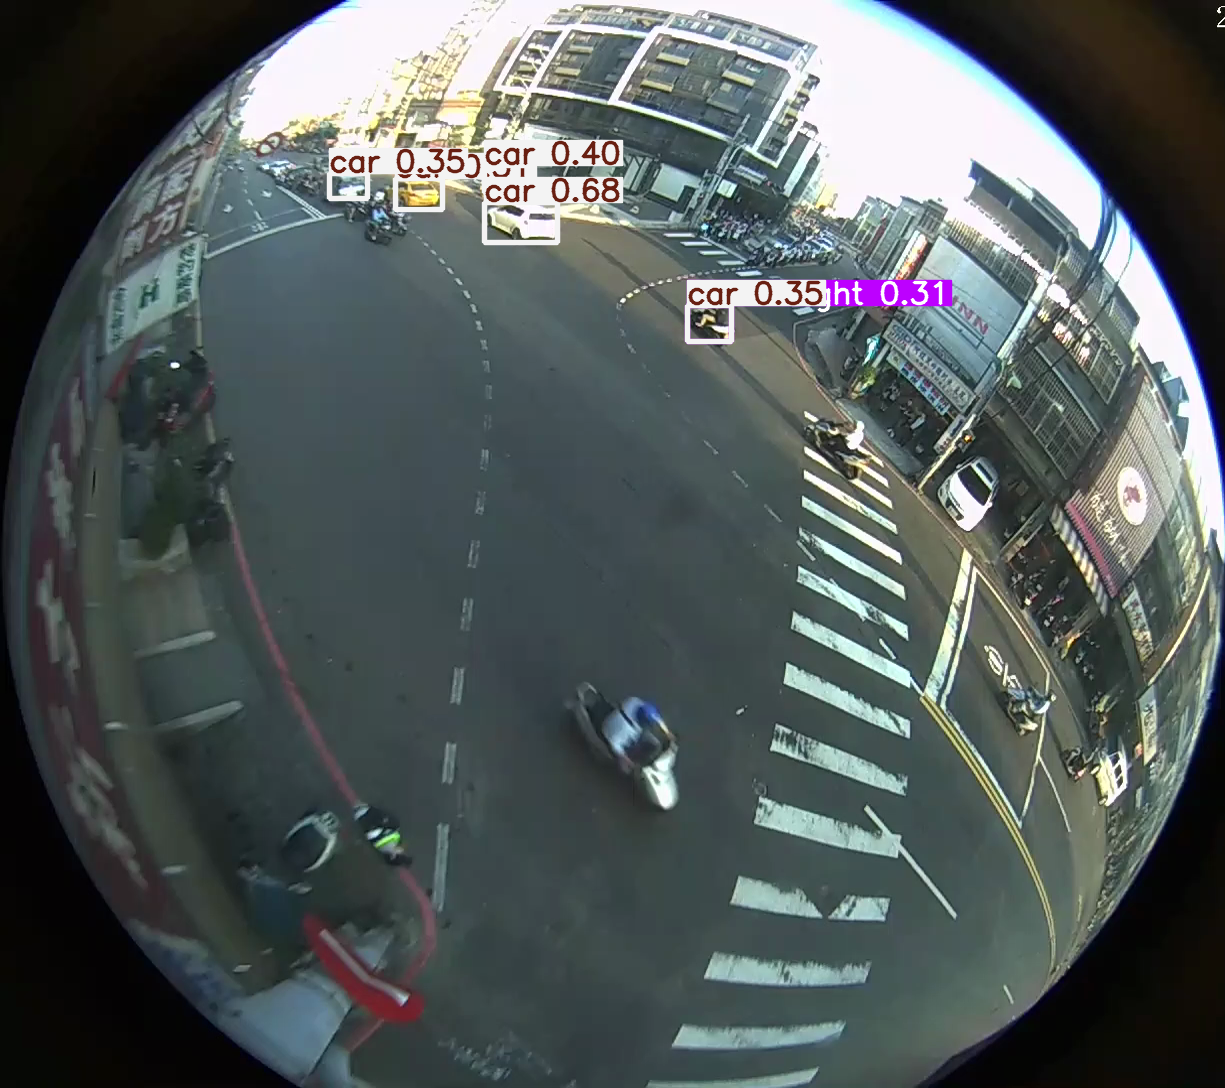

In [7]:
results = model(img, size=640)  # batch of images

# Results
results.print()
results.show() 